**Experiment 4**

Apply Principle Component Analysis (PCA) to reduce dimensionality and visuallize key component.


In [ ]:
import pandas as pd

# URL for the Heart Disease dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# Load the dataset into a pandas DataFrame
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

ds = pd.read_csv(url, names=column_names)

print(ds.head())

#pre processing
ds.replace('?', pd.NA, inplace=True)
ds = ds.apply(pd.to_numeric, errors='coerce')
ds.dropna(inplace=True)

# Separate features (X) and target (y)
X = ds.drop('num', axis=1)
y = ds['num']

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  num  
0    3.0  0.0  6.0    0  
1    2.0  3.0  3.0    2  
2    2.0  2.0  7.0    1  
3    3.0  0.0  3.0    0  
4    1.0  0.0  3.0    0  


Principal Components :
[[ 0.28586758  0.11680189  0.28621211  0.16784082  0.08350419  0.07609387
   0.14593784 -0.39270583  0.33313953  0.39700637  0.3520241   0.30641953
   0.34620842]
 [-0.41866153  0.431579    0.15253955 -0.39151404 -0.42820138 -0.23985575
  -0.26651507 -0.05414681  0.2082855   0.06174634  0.07449081 -0.15784224
   0.26344384]]
        PC1       PC2  num
0  1.130664 -1.087655    0
1  3.190926 -1.417885    2
2  3.124339  0.657008    1
3 -0.484339  1.410972    0
4 -2.284542 -0.330033    0
5 -2.204713  0.345079    0
6  1.922416 -1.685483    3
7 -0.739352 -0.811669    0
8  1.377516  0.033411    2
9  2.686410  0.819561    1


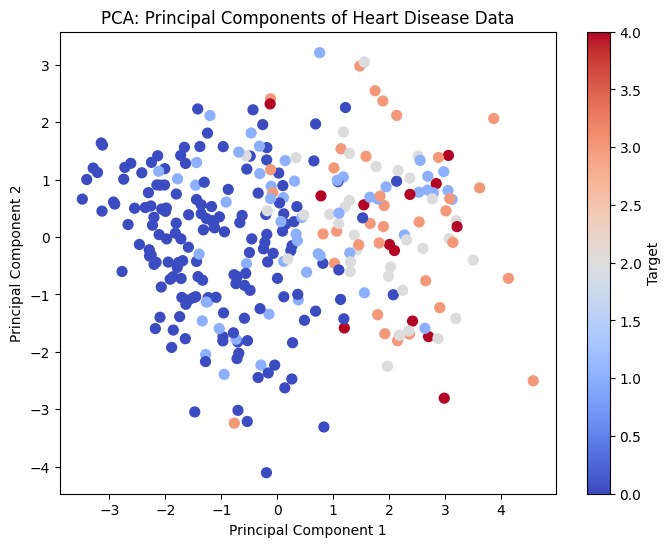

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Principal Components :")
print(pca.components_)

#Create a DataFrame for the PCA result and the target column
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df = pd.concat([pca_df, y.reset_index(drop=True)], axis=1)

print(pca_df.head(10))

#Visualize principal components
plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['num'], cmap='coolwarm', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Principal Components of Heart Disease Data')
plt.colorbar(label='Target')
plt.show()


Target value counts before binarization:
num
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64

Target value counts after binarization:
num
0    160
1    137
Name: count, dtype: int64

Principal Components:
[[ 0.28586758  0.11680189  0.28621211  0.16784082  0.08350419  0.07609387
   0.14593784 -0.39270583  0.33313953  0.39700637  0.3520241   0.30641953
   0.34620842]
 [-0.41866153  0.431579    0.15253955 -0.39151404 -0.42820138 -0.23985575
  -0.26651507 -0.05414681  0.2082855   0.06174634  0.07449081 -0.15784224
   0.26344384]]

Explained Variance Ratio:
[0.23695056 0.12349486]


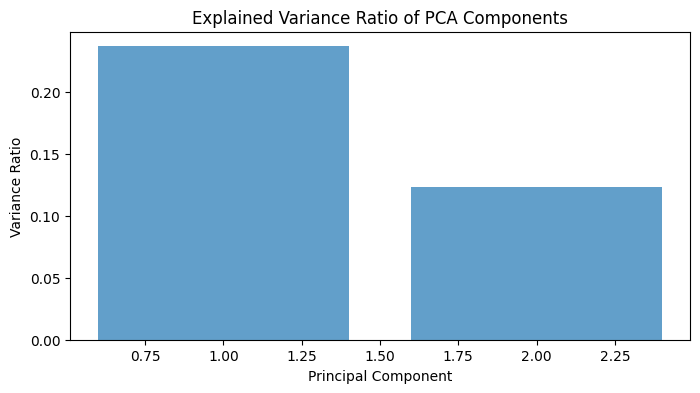

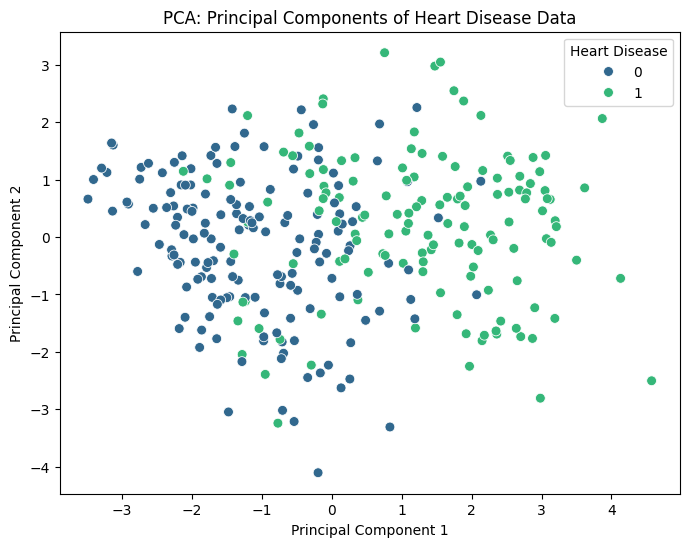

In [3]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
ds = pd.read_csv(url, names=column_names)

# Data preprocessing
ds.replace('?', pd.NA, inplace=True)  # Replace '?' with NaN
ds = ds.apply(pd.to_numeric, errors='coerce')  # Convert to numeric
ds.dropna(inplace=True)  # Drop rows with missing values

# Analyze target class distribution
print("Target value counts before binarization:")
print(ds['num'].value_counts())

# Binarize the target (0 = no disease, 1 = disease)
ds['num'] = (ds['num'] > 0).astype(int)
print("\nTarget value counts after binarization:")
print(ds['num'].value_counts())

# Separate features and target
X = ds.drop('num', axis=1)
y = ds['num']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Display PCA components and explained variance
print("\nPrincipal Components:")
print(pca.components_)
print("\nExplained Variance Ratio:")
print(pca.explained_variance_ratio_)

# Create DataFrame for PCA result and target
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df = pd.concat([pca_df, y.reset_index(drop=True)], axis=1)

# Visualize explained variance
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.7)
plt.title('Explained Variance Ratio of PCA Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.show()

# Scatter plot of PCA components with target
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='num', palette='viridis', s=50)
plt.title('PCA: Principal Components of Heart Disease Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Heart Disease', loc='upper right')
plt.show()
